In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import re

In [3]:
os.getcwd()

'/Users/chuqiwang/Documents/US_PFAS_Project/data_analysis/UCMR3&5'

## Data preparing

In [4]:
ucmr3_df = pd.read_csv('UCMR3/ucmr3_cleaned.csv', index_col=0)

In [5]:
ucmr5_df = pd.read_csv('UCMR5/ucmr5_cleaned.csv', index_col=0)

In [6]:
ucmr3_df.head()

,sample_id,sampling_location,data_source,latitude,longitude,sampling_date,pws_id,water_system_name,population,well_type,...,city,county,MRL,DL,analytical_methods,is_detected,analyte,concentration,pfas_total,note
0,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFOA,0.0,NaN,NaN
1,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,90.0,NaN,EPA 537,False,PFBS,0.0,NaN,NaN
2,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,10.0,NaN,EPA 537,False,PFHPA,0.0,NaN,NaN
3,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,30.0,NaN,EPA 537,False,PFHXS,0.0,NaN,NaN
4,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFNA,0.0,NaN,NaN


In [7]:
ucmr5_df.head()

,sample_id,sampling_location,data_source,latitude,longitude,sampling_date,pws_id,water_system_name,population,well_type,...,city,county,MRL,DL,analytical_methods,is_detected,analyte,concentration,pfas_total,note
0,810-79458-1,Entry point to Dist. System,UCMR5,NaN,NaN,2023-09-27,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,4.0,NaN,EPA 533,False,PFPES,0.0,NaN,NaN
1,810-79458-1,Entry point to Dist. System,UCMR5,NaN,NaN,2023-09-27,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,3.0,NaN,EPA 533,True,PFBS,3.6,NaN,NaN
2,810-79458-1,Entry point to Dist. System,UCMR5,NaN,NaN,2023-09-27,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,3.0,NaN,EPA 533,False,ADONA,0.0,NaN,NaN
3,810-73346-1,Entry point to Dist. System,UCMR5,NaN,NaN,2023-08-09,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,6.0,NaN,EPA 537.1,False,NMEFOSAA,0.0,NaN,NaN
4,810-79458-1,Entry point to Dist. System,UCMR5,NaN,NaN,2023-09-27,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,3.0,NaN,EPA 533,True,PFPEA,18.2,NaN,NaN


In [8]:
ucmr_df = pd.concat([ucmr3_df, ucmr5_df])
ucmr_df.index = range(0, len(ucmr_df))

In [9]:
ucmr_df['state'].unique()

array(['01', '05', '06', '08', '09', '10', 'AK', 'AL', 'AR', 'AS', 'AZ',
       'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NN', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY', '02', '04'],
      dtype=object)

In [10]:
ucmr_df['source_type'].unique()

array(['GU', 'SW', 'GW', 'MX'], dtype=object)

Source of water at the facility: SW (surface water), GW (ground water), GU (ground water under the direct influence of surface water), MX (any combination of SW, GW, and GU)

In [11]:
ucmr_df.shape

(1137772, 24)

In [12]:
ucmr_df.to_csv('ucmr_df.csv')

## Analysis by 4 water source types and data sources

In [10]:
ucmr_df.groupby('source_type').size().sort_values(ascending=False)

source_type
GW    673947
SW    409181
MX     37081
GU     17563
dtype: int64

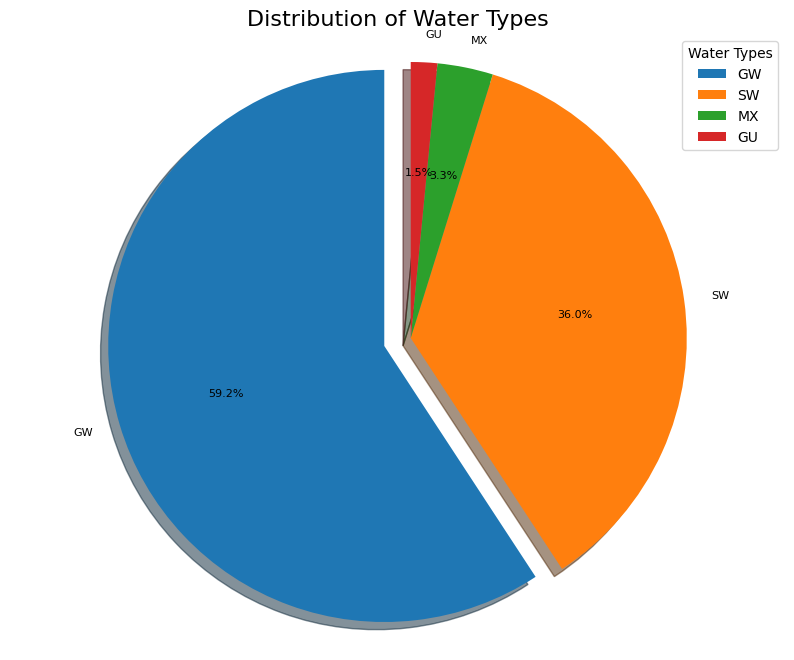

In [11]:
water_type_counts = ucmr_df.groupby('source_type').size().sort_values(ascending=False)

plt.figure(figsize=(10, 8))

plt.pie(
    water_type_counts, 
    labels=water_type_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    explode = [0.1 if index == water_type_counts.idxmax() else 0 for index in water_type_counts.index],
    shadow = True,
    textprops={'fontsize': 8}
)

plt.title('Distribution of Water Types', fontsize=16)
plt.axis('equal')  # Equal aspect ratio to make the pie chart a circle
plt.legend(water_type_counts.index, title="Water Types", loc="best", fontsize=10)  # Add a legend

# Show the pie chart
plt.show()


In [12]:
ucmr_df.groupby('source_type')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,source_type,concentration
0,GU,0.381671
1,GW,0.266209
2,MX,0.253521
3,SW,0.180396


Source of water at the facility: SW (surface water), GW (ground water), GU (ground water under the direct influence of surface water), MX (any combination of SW, GW, and GU)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/3026716873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


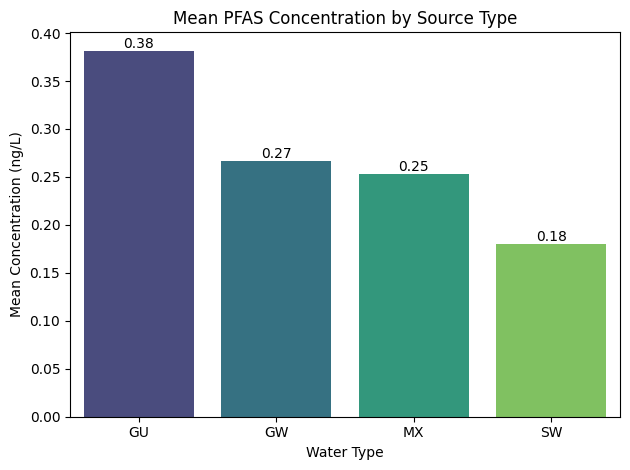

In [13]:
ax = sns.barplot(
    x='source_type', 
    y='concentration', 
    data=ucmr_df.groupby('source_type')['concentration'].mean().reset_index(), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by Source Type')
plt.xlabel('Water Type')
plt.ylabel('Mean Concentration (ng/L)')
plt.tight_layout()

# Add concentration numbers above each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 10, color = 'black',  # Customize text appearance
    )

# Show the plot
plt.show()

In [14]:
ucmr_df.groupby('data_source')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,data_source,concentration
0,UCMR3,0.469806
1,UCMR5,0.180265


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/739327054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


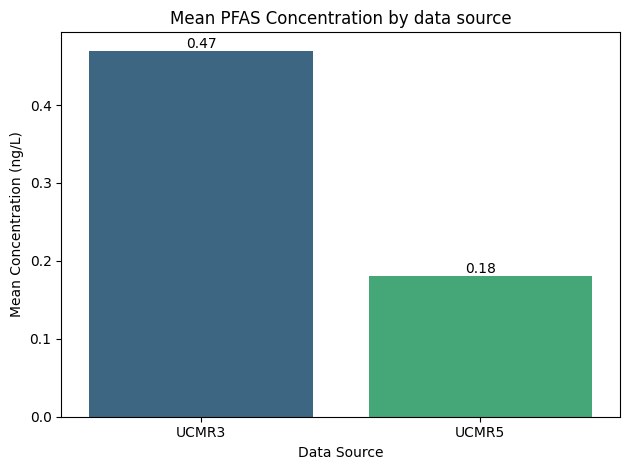

In [15]:
ax = sns.barplot(
    x='data_source', 
    y='concentration', 
    data=ucmr_df.groupby('data_source')['concentration'].mean().reset_index(), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by data source')
plt.xlabel('Data Source')
plt.ylabel('Mean Concentration (ng/L)')
plt.tight_layout()

# Add concentration numbers above each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 10, color = 'black',  # Customize text appearance
    )

# Show the plot
plt.show()

## Analysis by states

In [16]:
ucmr_df.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,state,concentration
35,MP,17.408442
17,DE,1.998568
14,CO,1.463674
20,GU,1.094689
33,MN,0.798467
...,...,...
7,10,0.000000
5,08,0.000000
59,VI,0.000000
3,05,0.000000


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/120352017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


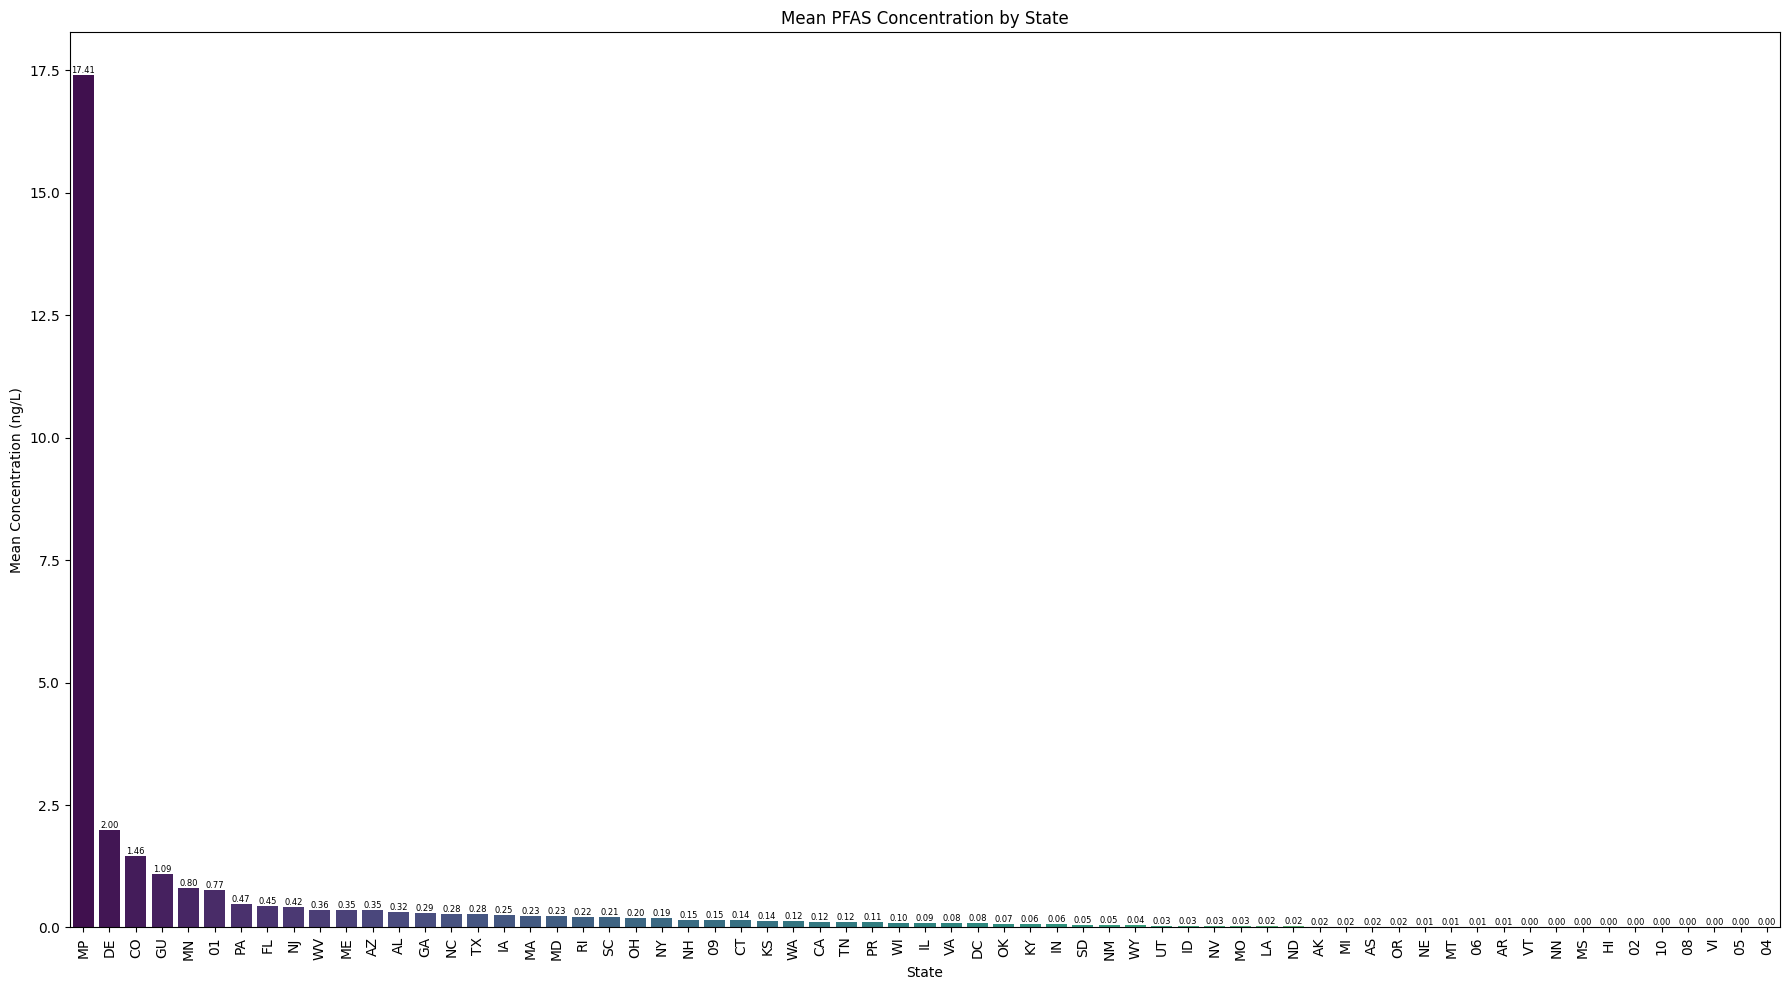

In [57]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(
    x='state', 
    y='concentration', 
    data=ucmr_df.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by State')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 6, color = 'black',  # Customize text appearance
    )


plt.show()

In [58]:
state_coordinates = {
    'AL': [32.806671, -86.791130],
    'AK': [61.370716, -152.404419],
    'AZ': [33.729759, -111.431221],
    'AR': [34.969704, -92.373123],
    'CA': [36.116203, -119.681564],
    'CO': [39.059811, -105.311104],
    'CT': [41.597782, -72.755371],
    'DE': [39.318523, -75.507141],
    'FL': [27.766279, -81.686783],
    'GA': [33.040619, -83.643074],
    'HI': [21.094318, -157.498337],
    'ID': [44.240459, -114.478828],
    'IL': [40.349457, -88.986137],
    'IN': [39.849426, -86.258278],
    'IA': [42.011539, -93.210526],
    'KS': [38.526600, -96.726486],
    'KY': [37.668140, -84.670067],
    'LA': [31.169546, -91.867805],
    'ME': [44.693947, -69.381927],
    'MD': [39.063946, -76.802101],
    'MA': [42.230171, -71.530106],
    'MI': [43.326618, -84.536095],
    'MN': [45.694454, -93.900192],
    'MS': [32.741646, -89.678696],
    'MO': [38.456085, -92.288368],
    'MT': [46.921925, -110.454353],
    'NE': [41.125370, -98.268082],
    'NV': [38.313515, -117.055374],
    'NH': [43.452492, -71.563896],
    'NJ': [40.298904, -74.521011],
    'NM': [34.840515, -106.248482],
    'NY': [42.165726, -74.948051],
    'NC': [35.630066, -79.806419],
    'ND': [47.528912, -99.784012],
    'OH': [40.388783, -82.764915],
    'OK': [35.565342, -96.928917],
    'OR': [44.572021, -122.070938],
    'PA': [40.590752, -77.209755],
    'RI': [41.680893, -71.511780],
    'SC': [33.856892, -80.945007],
    'SD': [44.299782, -99.438828],
    'TN': [35.747845, -86.692345],
    'TX': [31.054487, -97.563461],
    'UT': [40.150032, -111.862434],
    'VT': [44.045876, -72.710686],
    'VA': [37.769337, -78.169968],
    'WA': [47.400902, -121.490494],
    'WV': [38.491226, -80.954456],
    'WI': [44.268543, -89.616508],
    'WY': [42.755966, -107.302490]
}


In [61]:
ucmr_pfas_avg = ucmr_df.groupby('state')['concentration'].mean().reset_index() # mean concentration

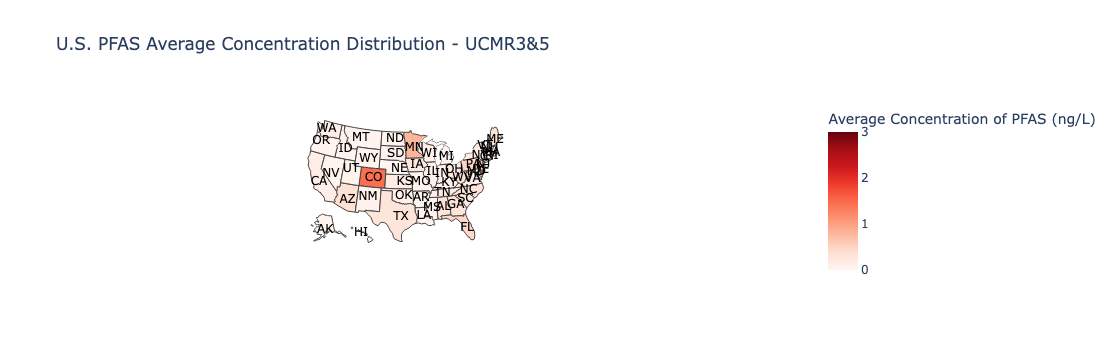

In [95]:
fig = px.choropleth(
    ucmr_pfas_avg, 
    locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
    locationmode="USA-states",  # Use the USA state map
    color='concentration',  # The PFAS analyte column to visualize
    hover_name='state',  # The column to show on hover (state names)
    scope="usa",  # Focus the map on the USA
    color_continuous_scale="Reds",  # Color scale for concentrations
    labels= {'concentration': 'Average Concentration of PFAS (ng/L)'},
    title='U.S. PFAS Concentration Distribution',
    range_color=[0, 3] 
)

# Customize the layout
fig.update_layout(
    title_text='U.S. PFAS Average Concentration Distribution - UCMR3&5',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
    )
)

# Add state code annotations
for state, coords in state_coordinates.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[coords[1]],
        lat=[coords[0]],
        text=state,
        mode='text',
        showlegend=False,
        textfont=dict(
            size=12,
            color='black'
        )
    ))

fig.write_html('avg_PFAS_concentration_map_ucmr3&5.html')
# Show the map
fig.show()


In [18]:
ucmr_df.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,analyte,concentration
10,PFBA,1.073043
23,PFOS,1.045252
24,PFPEA,0.965064
17,PFHXA,0.610014
18,PFHXS,0.601732
22,PFOA,0.468648
11,PFBS,0.336467
2,6:2 FTS,0.179938
15,PFHPA,0.144758
21,PFNA,0.018869


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/778518536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


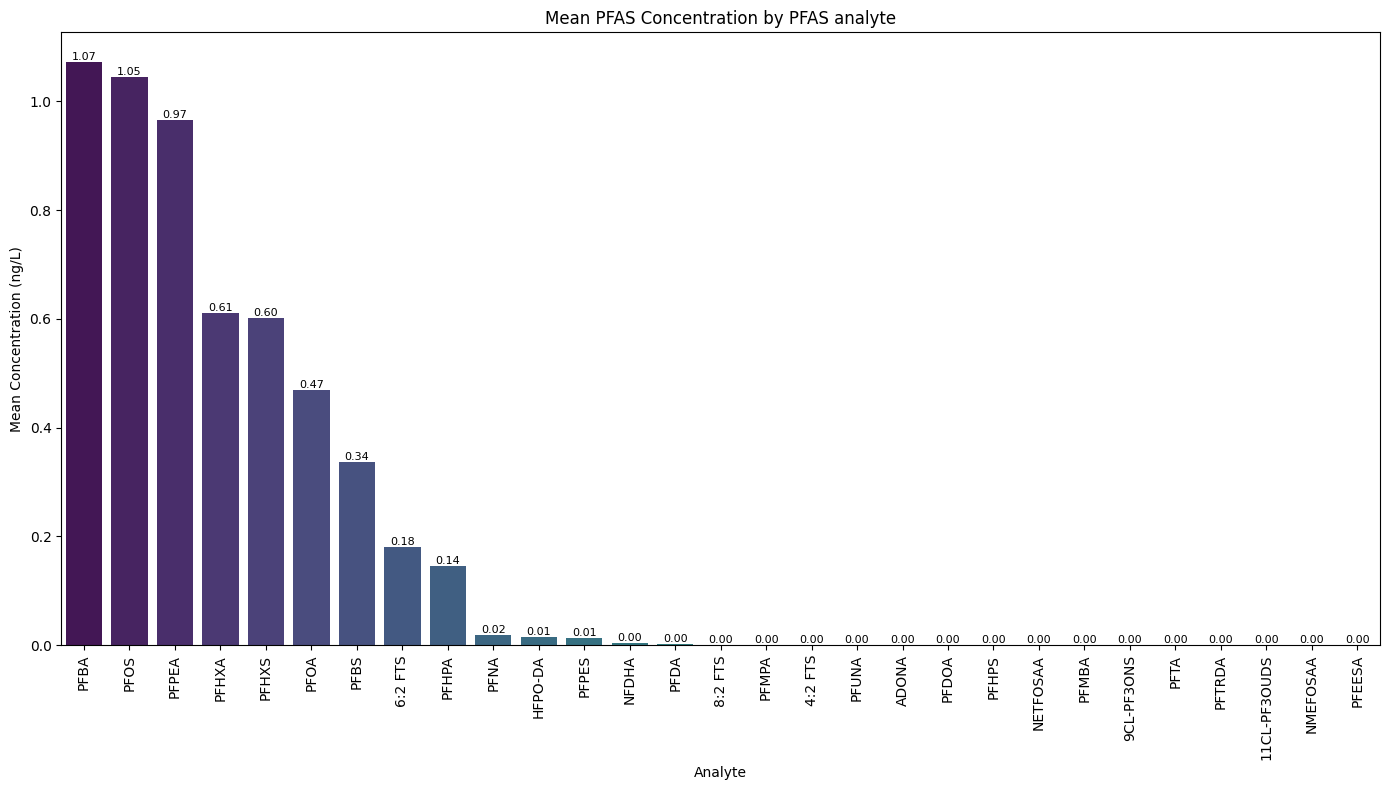

In [19]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='analyte', 
    y='concentration', 
    data=ucmr_df.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by PFAS analyte')
plt.xlabel('Analyte')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 8, color = 'black',  # Customize text appearance
    )


plt.show()

## Surface Water(SW)

In [20]:
ucmr_sw = ucmr_df[ucmr_df['source_type']=='SW']

In [21]:
ucmr_sw

,sample_id,sampling_location,data_source,latitude,longitude,sampling_date,pws_id,water_system_name,population,well_type,...,city,county,MRL,DL,analytical_methods,is_detected,analyte,concentration,pfas_total,note
24,2934713,EPTDS from Tank,UCMR3,NaN,NaN,2013-11-20,010109005,Mohegan Tribal Utility Authority,NaN,NaN,...,NaN,NaN,40.0,NaN,EPA 537,False,PFOS,0.0,NaN,NaN
25,2934713,EPTDS from Tank,UCMR3,NaN,NaN,2013-11-20,010109005,Mohegan Tribal Utility Authority,NaN,NaN,...,NaN,NaN,90.0,NaN,EPA 537,False,PFBS,0.0,NaN,NaN
26,2934713,EPTDS from Tank,UCMR3,NaN,NaN,2013-11-20,010109005,Mohegan Tribal Utility Authority,NaN,NaN,...,NaN,NaN,10.0,NaN,EPA 537,False,PFHPA,0.0,NaN,NaN
27,2934713,EPTDS from Tank,UCMR3,NaN,NaN,2013-11-20,010109005,Mohegan Tribal Utility Authority,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFNA,0.0,NaN,NaN
28,2934713,EPTDS from Tank,UCMR3,NaN,NaN,2013-11-20,010109005,Mohegan Tribal Utility Authority,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFOA,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137680,110168P,TREATMENT PLANT,UCMR5,NaN,NaN,2023-11-20,WY5680085,YNP-OLD FAITHFUL,NaN,NaN,...,NaN,NaN,3.0,NaN,EPA 533,False,PFHXS,0.0,NaN,NaN
1137681,110168P,TREATMENT PLANT,UCMR5,NaN,NaN,2023-11-20,WY5680085,YNP-OLD FAITHFUL,NaN,NaN,...,NaN,NaN,2.0,NaN,EPA 533,False,9CL-PF3ONS,0.0,NaN,NaN
1137682,110168P,TREATMENT PLANT,UCMR5,NaN,NaN,2023-11-20,WY5680085,YNP-OLD FAITHFUL,NaN,NaN,...,NaN,NaN,5.0,NaN,EPA 533,False,11CL-PF3OUDS,0.0,NaN,NaN
1137683,110168P,TREATMENT PLANT,UCMR5,NaN,NaN,2023-11-20,WY5680085,YNP-OLD FAITHFUL,NaN,NaN,...,NaN,NaN,4.0,NaN,EPA 533,False,PFOS,0.0,NaN,NaN


In [22]:
ucmr_sw.groupby('data_source')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,data_source,concentration
1,UCMR5,0.187159
0,UCMR3,0.152293


In [23]:
ucmr_sw.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,state,concentration
32,MP,24.583333
14,DE,2.478483
7,AL,0.706269
15,FL,0.464223
53,TX,0.459995
...,...,...
6,AK,0.000000
5,10,0.000000
3,08,0.000000
2,04,0.000000


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/2768433747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


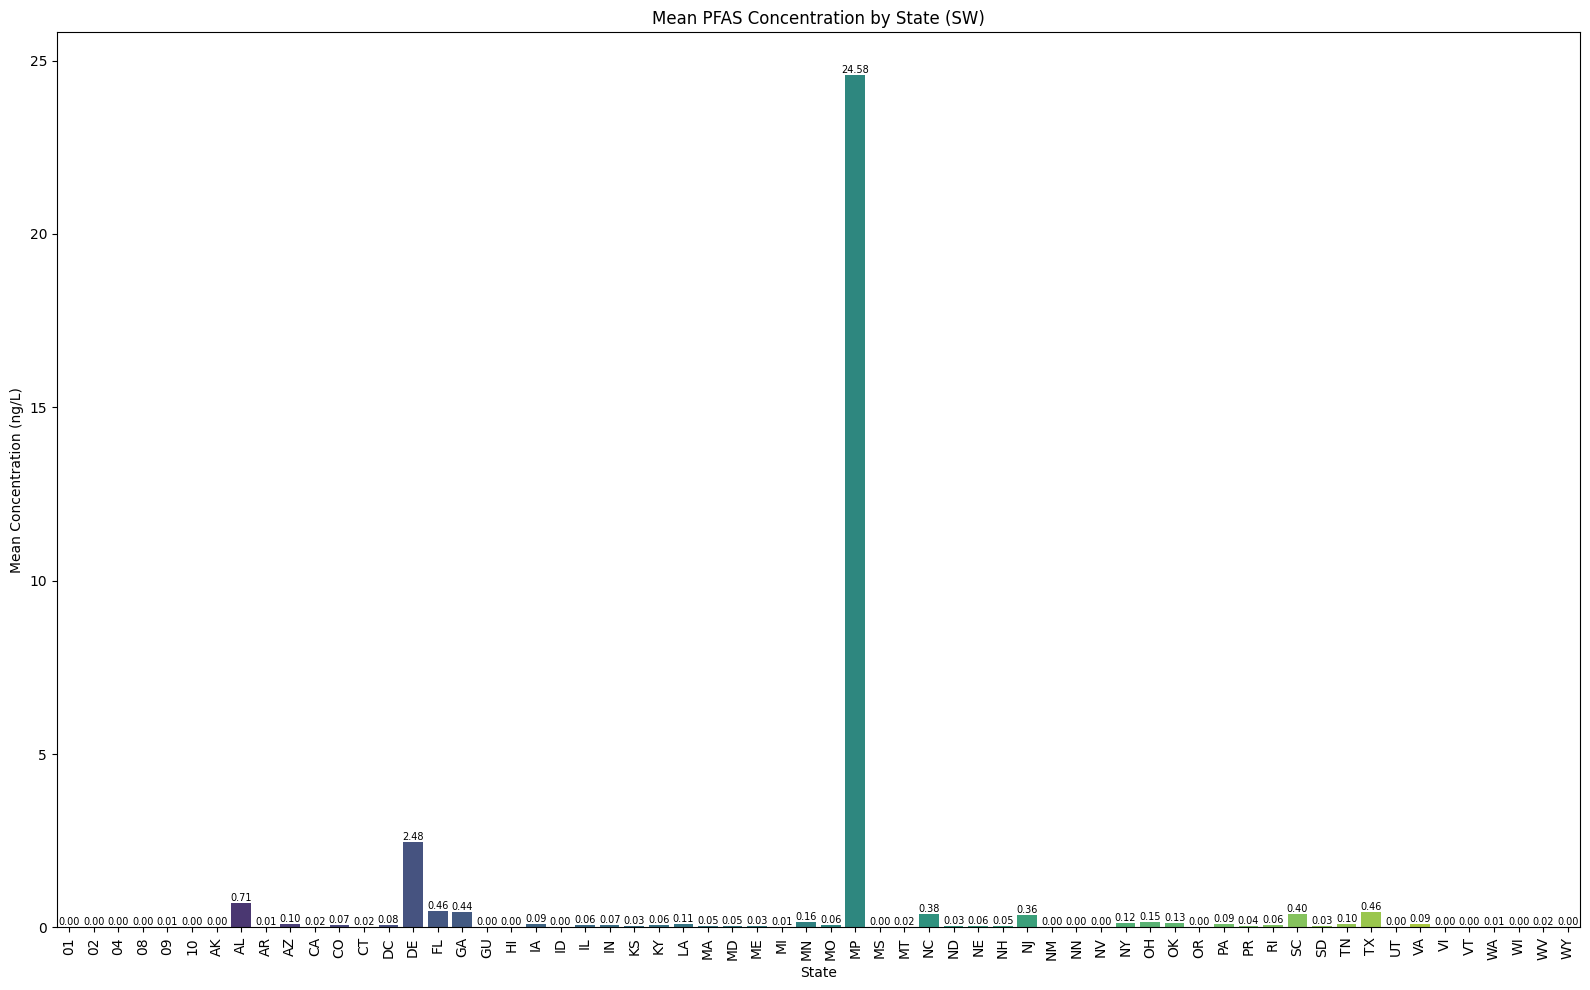

In [24]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x='state', 
    y='concentration', 
    data=ucmr_sw.groupby('state')['concentration'].mean().reset_index(), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by State (SW)')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 7, color = 'black',  # Customize text appearance
    )


plt.show()

In [79]:
ucmr_pfas_avg_sw = ucmr_sw.groupby('state')['concentration'].mean().reset_index() # mean concentration

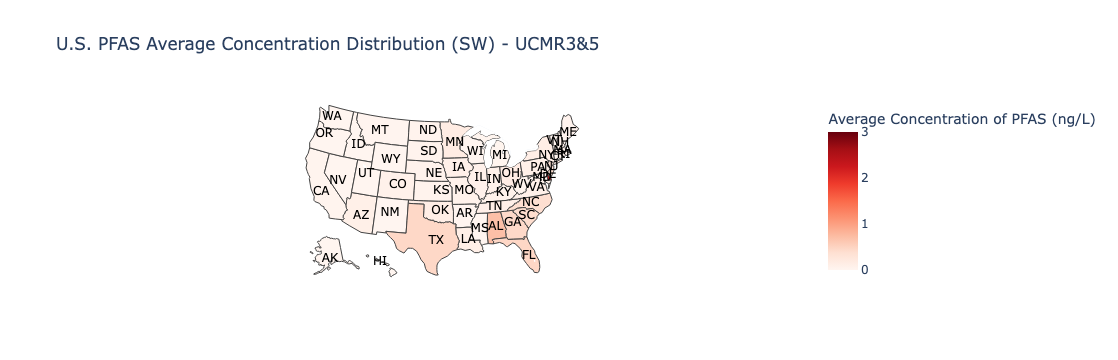

In [96]:
fig = px.choropleth(
    ucmr_pfas_avg_sw, 
    locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
    locationmode="USA-states",  # Use the USA state map
    color='concentration',  # The PFAS analyte column to visualize
    hover_name='state',  # The column to show on hover (state names)
    scope="usa",  # Focus the map on the USA
    color_continuous_scale="Reds",  # Color scale for concentrations
    labels= {'concentration': 'Average Concentration of PFAS (ng/L)'},
    title='U.S. PFAS Concentration Distribution',
    range_color=[0, 3] 
)

# Customize the layout
fig.update_layout(
    title_text='U.S. PFAS Average Concentration Distribution (SW) - UCMR3&5',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
    )
)

# Add state code annotations
for state, coords in state_coordinates.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[coords[1]],
        lat=[coords[0]],
        text=state,
        mode='text',
        showlegend=False,
        textfont=dict(
            size=12,
            color='black'
        )
    ))
fig.write_html('avg_PFAS_concentration_map_ucmr3&5(SW).html')
# Show the map
fig.show()

In [25]:
ucmr_sw.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,analyte,concentration
10,PFBA,1.358278
24,PFPEA,1.181095
17,PFHXA,0.746288
11,PFBS,0.418832
23,PFOS,0.395707
22,PFOA,0.302416
2,6:2 FTS,0.160877
18,PFHXS,0.152725
15,PFHPA,0.119727
6,HFPO-DA,0.032525


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/2259646347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


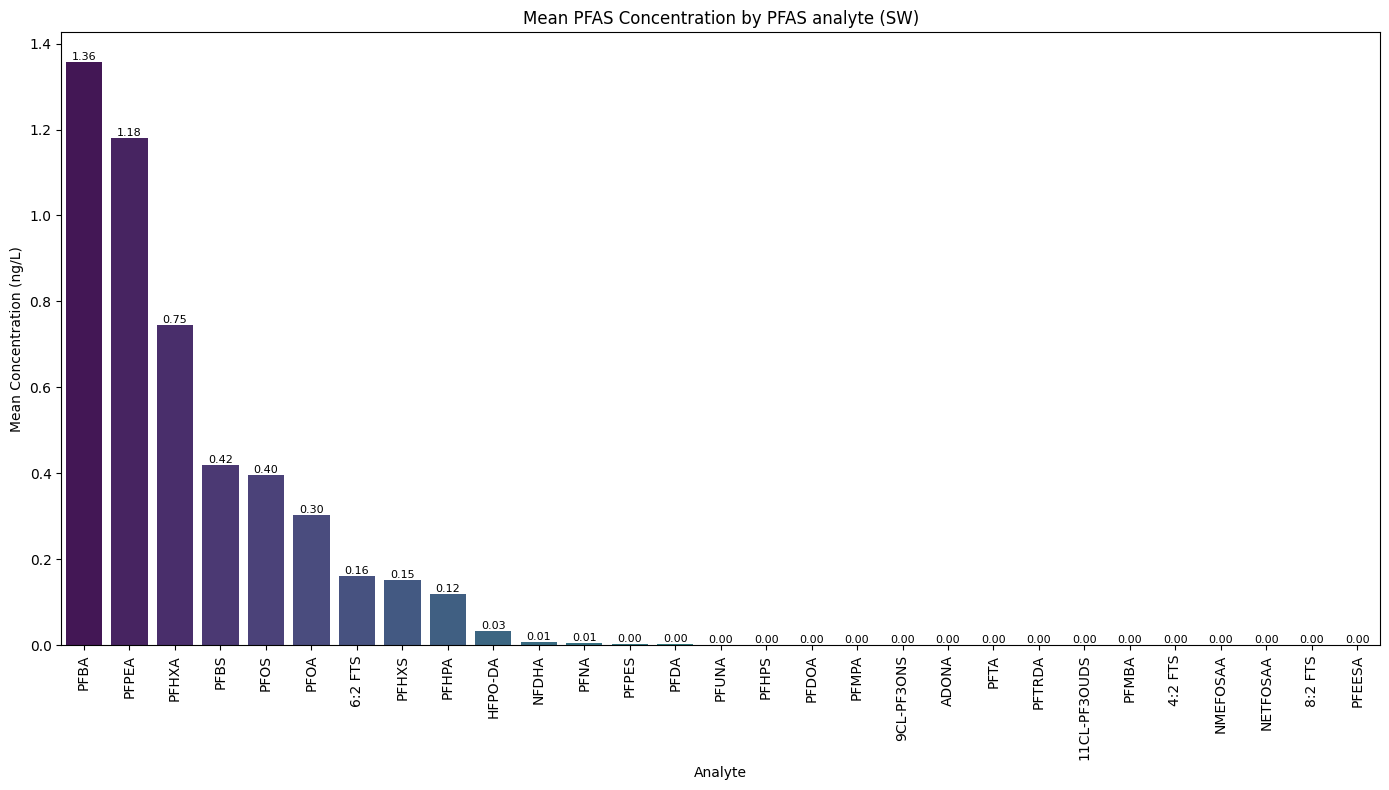

In [26]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='analyte', 
    y='concentration', 
    data=ucmr_sw.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by PFAS analyte (SW)')
plt.xlabel('Analyte')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 8, color = 'black',  # Customize text appearance
    )


plt.show()

## Ground Water (GW)

In [27]:
ucmr_gw = ucmr_df[ucmr_df['source_type']=='GW']

In [28]:
ucmr_gw

,sample_id,sampling_location,data_source,latitude,longitude,sampling_date,pws_id,water_system_name,population,well_type,...,city,county,MRL,DL,analytical_methods,is_detected,analyte,concentration,pfas_total,note
48,3138333,Treatment Plant EPTDS,UCMR3,NaN,NaN,2014-11-12,055293201,Mt. Pleasant,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFNA,0.0,NaN,NaN
49,3138333,Treatment Plant EPTDS,UCMR3,NaN,NaN,2014-11-12,055293201,Mt. Pleasant,NaN,NaN,...,NaN,NaN,40.0,NaN,EPA 537,False,PFOS,0.0,NaN,NaN
50,3138333,Treatment Plant EPTDS,UCMR3,NaN,NaN,2014-11-12,055293201,Mt. Pleasant,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFOA,0.0,NaN,NaN
51,3138333,Treatment Plant EPTDS,UCMR3,NaN,NaN,2014-11-12,055293201,Mt. Pleasant,NaN,NaN,...,NaN,NaN,10.0,NaN,EPA 537,False,PFHPA,0.0,NaN,NaN
52,3138333,Treatment Plant EPTDS,UCMR3,NaN,NaN,2014-11-12,055293201,Mt. Pleasant,NaN,NaN,...,NaN,NaN,30.0,NaN,EPA 537,False,PFHXS,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137738,106314P,CHLORINATOR,UCMR5,NaN,NaN,2023-07-30,WY5680095,GTNP-COLTER BAY VILLAGE,NaN,NaN,...,NaN,NaN,7.0,NaN,EPA 537.1,False,PFTRDA,0.0,NaN,NaN
1137739,106314P,CHLORINATOR,UCMR5,NaN,NaN,2023-07-30,WY5680095,GTNP-COLTER BAY VILLAGE,NaN,NaN,...,NaN,NaN,5.0,NaN,EPA 533,False,PFBA,0.0,NaN,NaN
1137740,106314P,CHLORINATOR,UCMR5,NaN,NaN,2023-07-30,WY5680095,GTNP-COLTER BAY VILLAGE,NaN,NaN,...,NaN,NaN,8.0,NaN,EPA 537.1,False,PFTA,0.0,NaN,NaN
1137741,106314P,CHLORINATOR,UCMR5,NaN,NaN,2023-07-30,WY5680095,GTNP-COLTER BAY VILLAGE,NaN,NaN,...,NaN,NaN,5.0,NaN,EPA 533,False,11CL-PF3OUDS,0.0,NaN,NaN


In [29]:
ucmr_gw.groupby('data_source')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,data_source,concentration
0,UCMR3,0.664690
1,UCMR5,0.166427


In [30]:
ucmr_gw.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,state,concentration
33,MP,17.320855
13,CO,4.727048
15,DE,1.901503
61,WV,1.466866
18,GU,1.100559
...,...,...
57,VI,0.000000
37,ND,0.000000
4,08,0.000000
2,05,0.000000


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/1687977928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


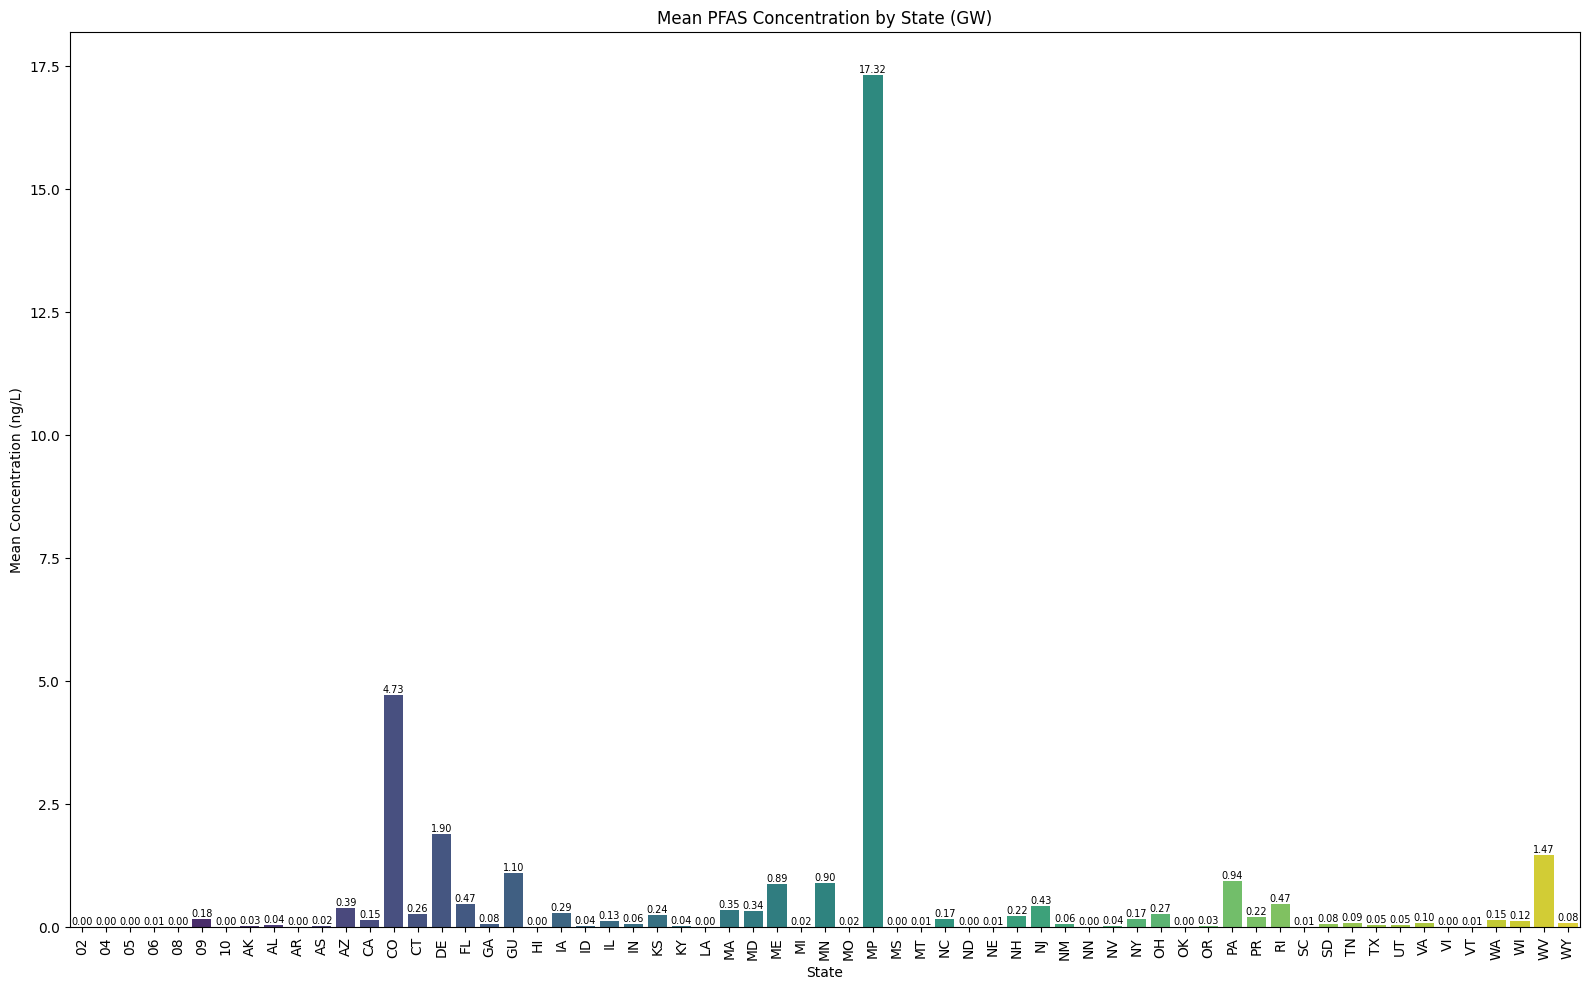

In [31]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x='state', 
    y='concentration', 
    data=ucmr_gw.groupby('state')['concentration'].mean().reset_index(), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by State (GW)')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 7, color = 'black',  # Customize text appearance
    )


plt.show()

In [84]:
ucmr_pfas_avg_gw = ucmr_gw.groupby('state')['concentration'].mean().reset_index() # mean concentration

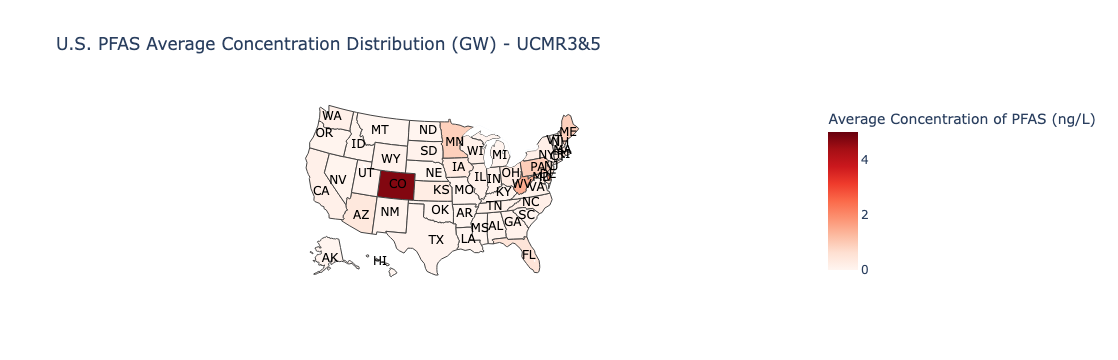

In [97]:
fig = px.choropleth(
    ucmr_pfas_avg_gw, 
    locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
    locationmode="USA-states",  # Use the USA state map
    color='concentration',  # The PFAS analyte column to visualize
    hover_name='state',  # The column to show on hover (state names)
    scope="usa",  # Focus the map on the USA
    color_continuous_scale="Reds",  # Color scale for concentrations
    labels= {'concentration': 'Average Concentration of PFAS (ng/L)'},
    title='U.S. PFAS Concentration Distribution',
    range_color=[0, 5] 
)

# Customize the layout
fig.update_layout(
    title_text='U.S. PFAS Average Concentration Distribution (GW) - UCMR3&5',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
    )
)

# Add state code annotations
for state, coords in state_coordinates.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[coords[1]],
        lat=[coords[0]],
        text=state,
        mode='text',
        showlegend=False,
        textfont=dict(
            size=12,
            color='black'
        )
    ))
fig.write_html('avg_PFAS_concentration_map_ucmr3&5(GW).html')
# Show the map
fig.show()

In [32]:
ucmr_gw.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,analyte,concentration
23,PFOS,1.447159
10,PFBA,0.908214
18,PFHXS,0.866643
24,PFPEA,0.713506
22,PFOA,0.568744
17,PFHXA,0.498108
11,PFBS,0.270160
15,PFHPA,0.160363
2,6:2 FTS,0.129183
21,PFNA,0.027828


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/923072309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


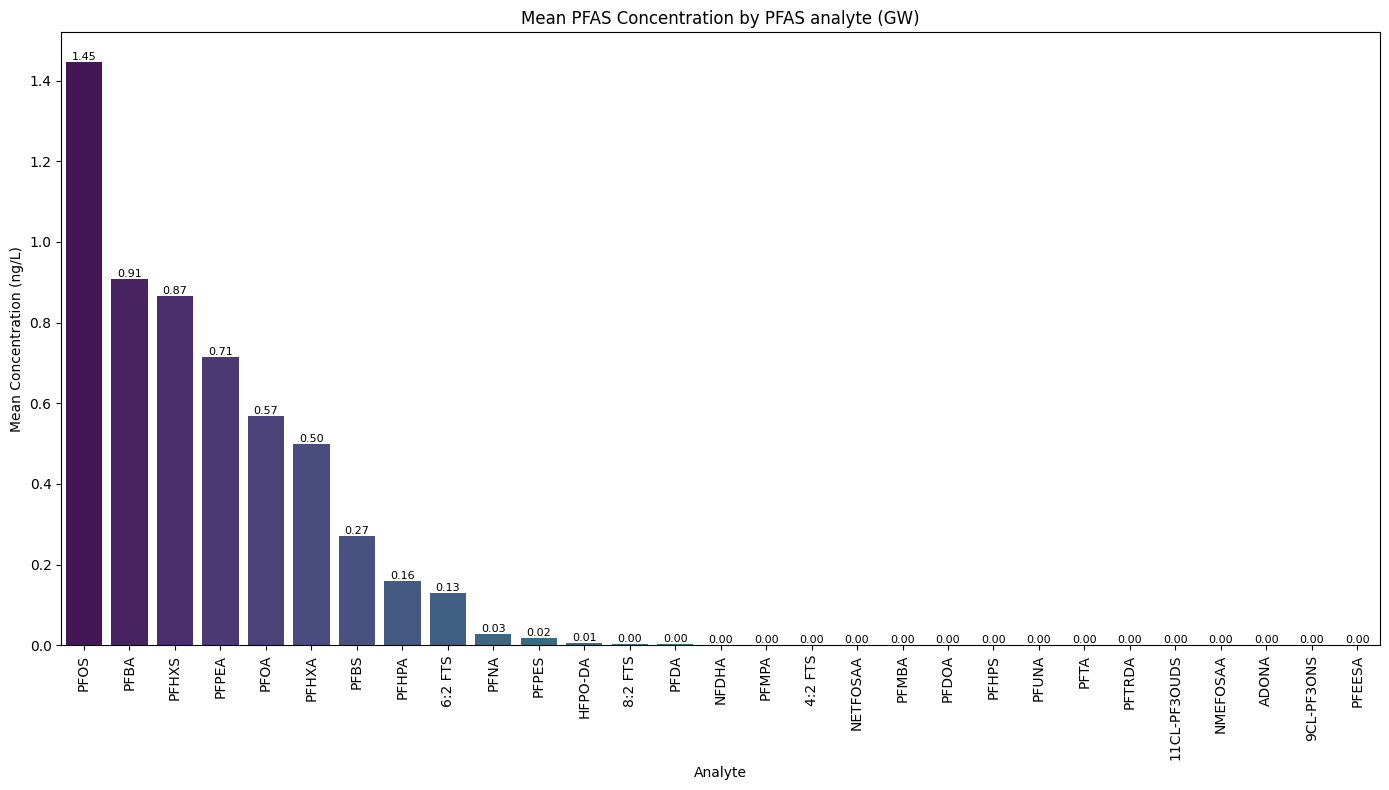

In [33]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='analyte', 
    y='concentration', 
    data=ucmr_gw.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by PFAS analyte (GW)')
plt.xlabel('Analyte')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 8, color = 'black',  # Customize text appearance
    )


plt.show()

## Ground water under the direct influence of surface water (GU)

In [34]:
ucmr_gu = ucmr_df[ucmr_df['source_type']=='GU']

In [35]:
ucmr_gu

,sample_id,sampling_location,data_source,latitude,longitude,sampling_date,pws_id,water_system_name,population,well_type,...,city,county,MRL,DL,analytical_methods,is_detected,analyte,concentration,pfas_total,note
0,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFOA,0.0,NaN,NaN
1,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,90.0,NaN,EPA 537,False,PFBS,0.0,NaN,NaN
2,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,10.0,NaN,EPA 537,False,PFHPA,0.0,NaN,NaN
3,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,30.0,NaN,EPA 537,False,PFHXS,0.0,NaN,NaN
4,3209653,WTP EPTDS,UCMR3,NaN,NaN,2015-03-17,010106001,Mashantucket Pequot Water System,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFNA,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137506,810-97851-1,Entry Point to Dist. System,UCMR5,NaN,NaN,2024-03-18,WY5601415,"CASPER, CITY OF",NaN,NaN,...,NaN,NaN,3.0,NaN,EPA 533,False,PFHPA,0.0,NaN,NaN
1137507,810-97851-1,Entry Point to Dist. System,UCMR5,NaN,NaN,2024-03-18,WY5601415,"CASPER, CITY OF",NaN,NaN,...,NaN,NaN,4.0,NaN,EPA 533,False,PFNA,0.0,NaN,NaN
1137508,810-97851-1,Entry Point to Dist. System,UCMR5,NaN,NaN,2024-03-18,WY5601415,"CASPER, CITY OF",NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 533,False,NFDHA,0.0,NaN,NaN
1137509,810-97851-1,Entry Point to Dist. System,UCMR5,NaN,NaN,2024-03-18,WY5601415,"CASPER, CITY OF",NaN,NaN,...,NaN,NaN,2.0,NaN,EPA 533,False,9CL-PF3ONS,0.0,NaN,NaN


In [36]:
ucmr_gu.groupby('data_source')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,data_source,concentration
0,UCMR3,0.407221
1,UCMR5,0.377199


In [37]:
ucmr_gu.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,state,concentration
24,OK,2.402597
22,NY,1.951802
33,WV,1.371574
0,01,1.066429
12,KY,1.047414
5,CO,0.835695
7,GA,0.648618
8,IA,0.492090
13,MA,0.407415
2,AL,0.393246


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/2846751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


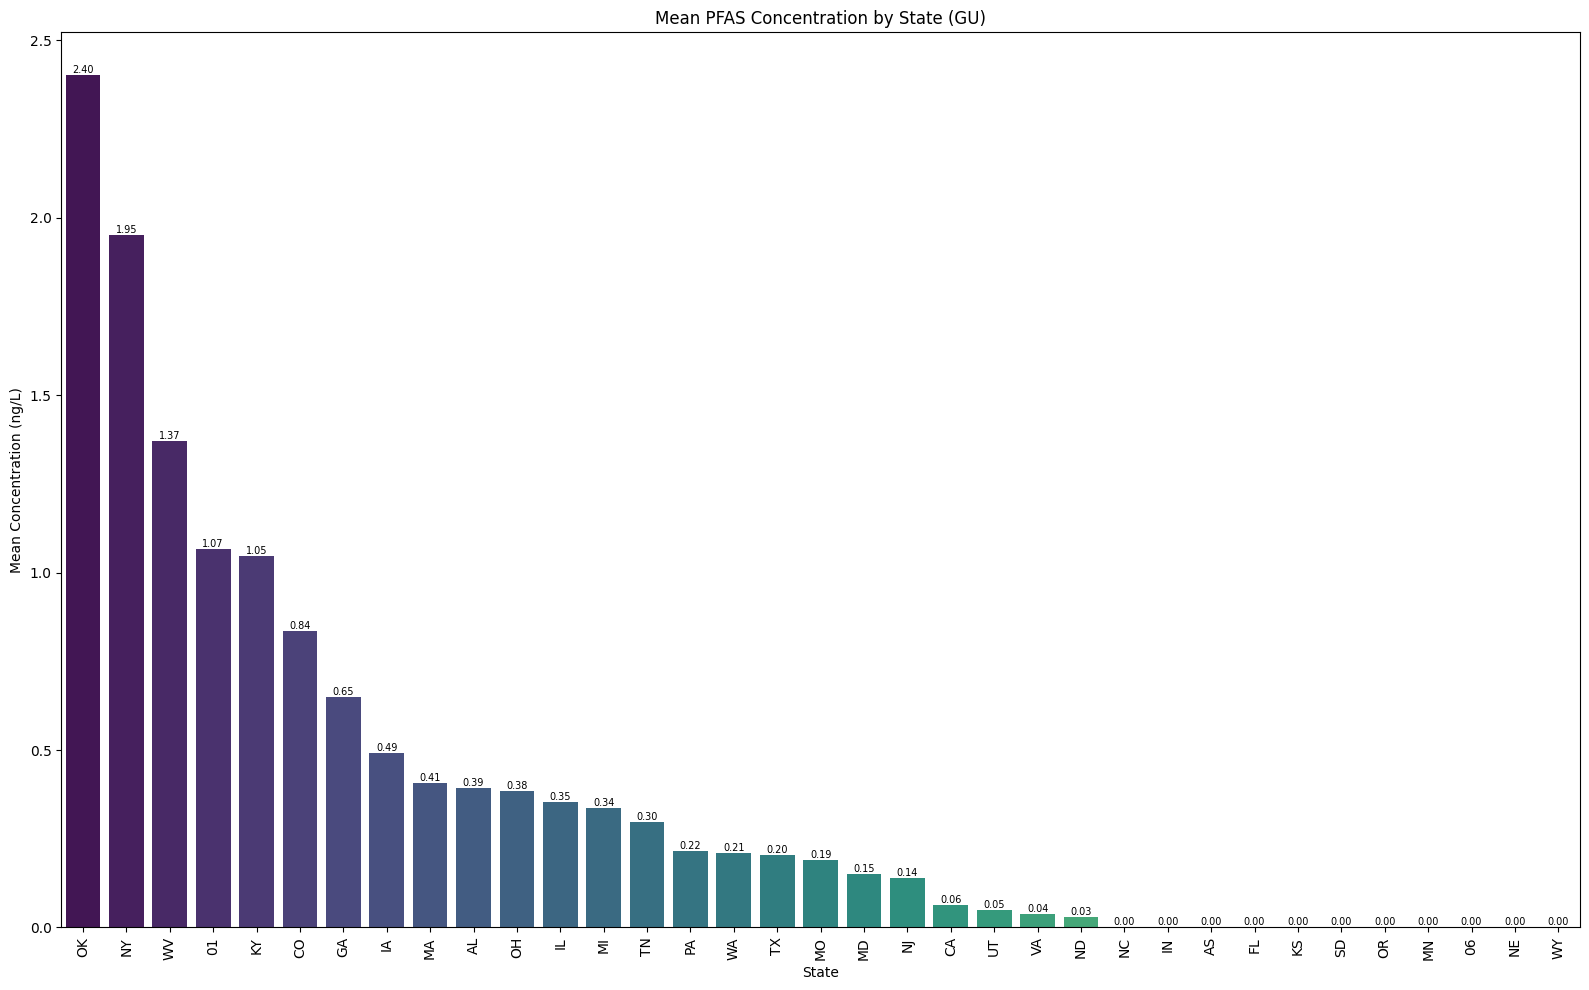

In [38]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x='state', 
    y='concentration', 
    data=ucmr_gu.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by State (GU)')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 7, color = 'black',  # Customize text appearance
    )


plt.show()

In [89]:
ucmr_pfas_avg_gu = ucmr_gu.groupby('state')['concentration'].mean().reset_index() # mean concentration

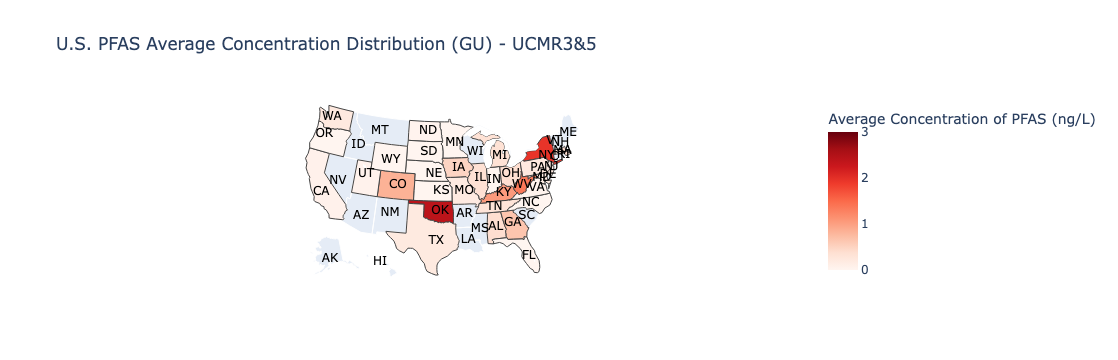

In [98]:
fig = px.choropleth(
    ucmr_pfas_avg_gu, 
    locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
    locationmode="USA-states",  # Use the USA state map
    color='concentration',  # The PFAS analyte column to visualize
    hover_name='state',  # The column to show on hover (state names)
    scope="usa",  # Focus the map on the USA
    color_continuous_scale="Reds",  # Color scale for concentrations
    labels= {'concentration': 'Average Concentration of PFAS (ng/L)'},
    title='U.S. PFAS Concentration Distribution',
    range_color=[0, 3] 
)

# Customize the layout
fig.update_layout(
    title_text='U.S. PFAS Average Concentration Distribution (GU) - UCMR3&5',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
    )
)

# Add state code annotations
for state, coords in state_coordinates.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[coords[1]],
        lat=[coords[0]],
        text=state,
        mode='text',
        showlegend=False,
        textfont=dict(
            size=12,
            color='black'
        )
    ))
fig.write_html('avg_PFAS_concentration_map_ucmr3&5(GU).html')
# Show the map
fig.show()

In [39]:
ucmr_gu.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,analyte,concentration
24,PFPEA,1.891423
23,PFOS,1.635116
17,PFHXA,1.420233
18,PFHXS,1.110327
11,PFBS,0.955053
10,PFBA,0.877626
22,PFOA,0.685547
15,PFHPA,0.255537
2,6:2 FTS,0.136452
25,PFPES,0.116342


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/3179302307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


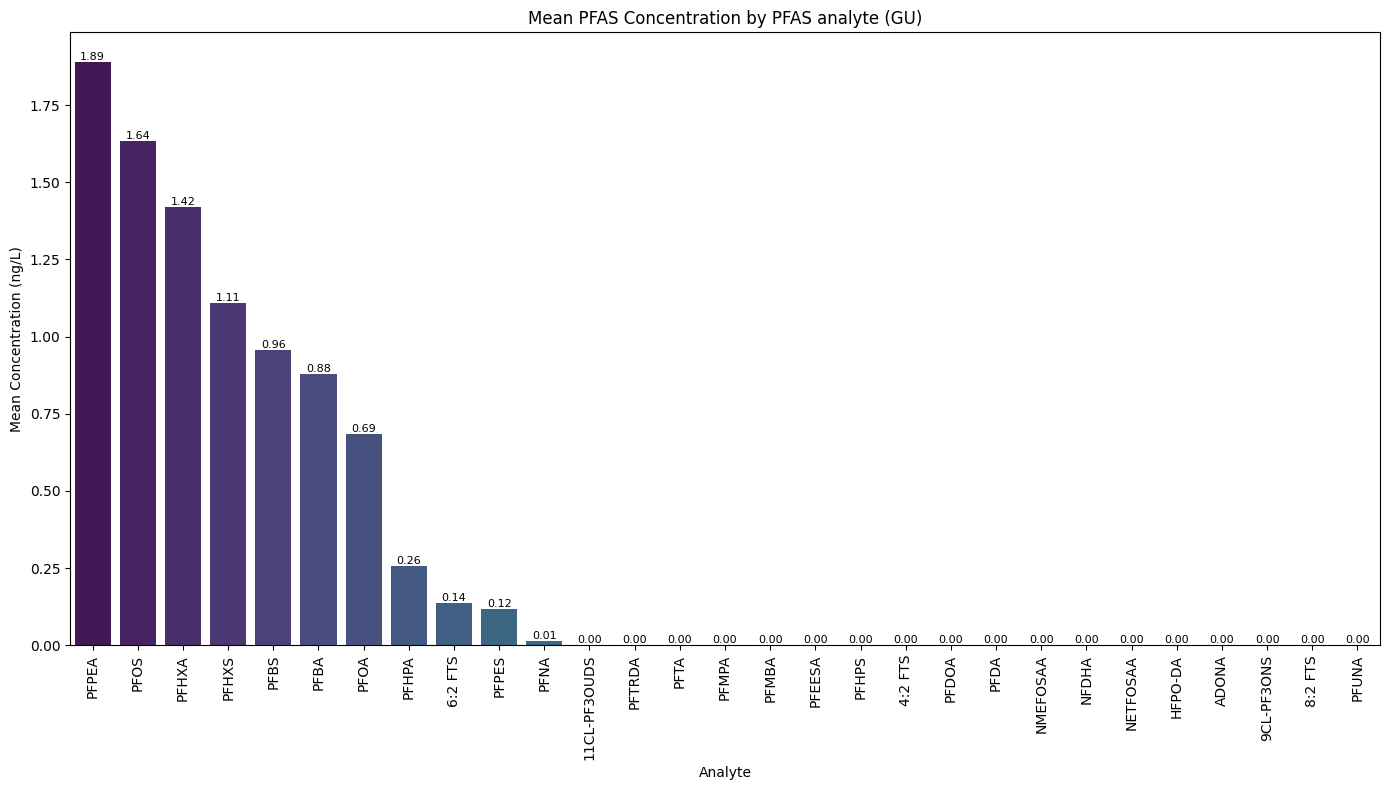

In [40]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='analyte', 
    y='concentration', 
    data=ucmr_gu.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by PFAS analyte (GU)')
plt.xlabel('Analyte')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 8, color = 'black',  # Customize text appearance
    )


plt.show()

## Any combination of SW, GW, and GU (MX)

In [41]:
ucmr_mx = ucmr_df[ucmr_df['source_type']=='MX']

In [42]:
ucmr_mx

,sample_id,sampling_location,data_source,latitude,longitude,sampling_date,pws_id,water_system_name,population,well_type,...,city,county,MRL,DL,analytical_methods,is_detected,analyte,concentration,pfas_total,note
792,3113009,Pit 18,UCMR3,NaN,NaN,2014-09-24,AK2211423,USAF Elmendorf AFB,NaN,NaN,...,NaN,NaN,90.0,NaN,EPA 537,False,PFBS,0.0,NaN,NaN
793,3113009,Pit 18,UCMR3,NaN,NaN,2014-09-24,AK2211423,USAF Elmendorf AFB,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFOA,0.0,NaN,NaN
794,3113009,Pit 18,UCMR3,NaN,NaN,2014-09-24,AK2211423,USAF Elmendorf AFB,NaN,NaN,...,NaN,NaN,40.0,NaN,EPA 537,False,PFOS,0.0,NaN,NaN
795,3113009,Pit 18,UCMR3,NaN,NaN,2014-09-24,AK2211423,USAF Elmendorf AFB,NaN,NaN,...,NaN,NaN,20.0,NaN,EPA 537,False,PFNA,0.0,NaN,NaN
796,3113009,Pit 18,UCMR3,NaN,NaN,2014-09-24,AK2211423,USAF Elmendorf AFB,NaN,NaN,...,NaN,NaN,30.0,NaN,EPA 537,False,PFHXS,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137767,117104R,Facility 930 - Booker Road and Cheyenne Road,UCMR5,NaN,NaN,2024-04-22,WY5680122,USAF F.E. WARREN AFB,NaN,NaN,...,NaN,NaN,4.0,NaN,EPA 533,False,PFOA,0.0,NaN,NaN
1137768,117104R,Facility 930 - Booker Road and Cheyenne Road,UCMR5,NaN,NaN,2024-04-22,WY5680122,USAF F.E. WARREN AFB,NaN,NaN,...,NaN,NaN,4.0,NaN,EPA 533,False,PFMPA,0.0,NaN,NaN
1137769,117104R,Facility 930 - Booker Road and Cheyenne Road,UCMR5,NaN,NaN,2024-04-22,WY5680122,USAF F.E. WARREN AFB,NaN,NaN,...,NaN,NaN,2.0,NaN,EPA 533,False,PFUNA,0.0,NaN,NaN
1137770,117104R,Facility 930 - Booker Road and Cheyenne Road,UCMR5,NaN,NaN,2024-04-22,WY5680122,USAF F.E. WARREN AFB,NaN,NaN,...,NaN,NaN,3.0,NaN,EPA 533,False,PFHXS,0.0,NaN,NaN


In [43]:
ucmr_mx.groupby('data_source')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,data_source,concentration
0,UCMR3,0.277621
1,UCMR5,0.249865


In [44]:
ucmr_mx.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,state,concentration
1,AL,3.524419
4,CO,1.774912
19,NJ,0.945677
17,NC,0.747407
32,TX,0.733596
29,SC,0.621411
14,MI,0.305769
9,IL,0.263547
15,MN,0.234483
5,CT,0.207099


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/923134728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


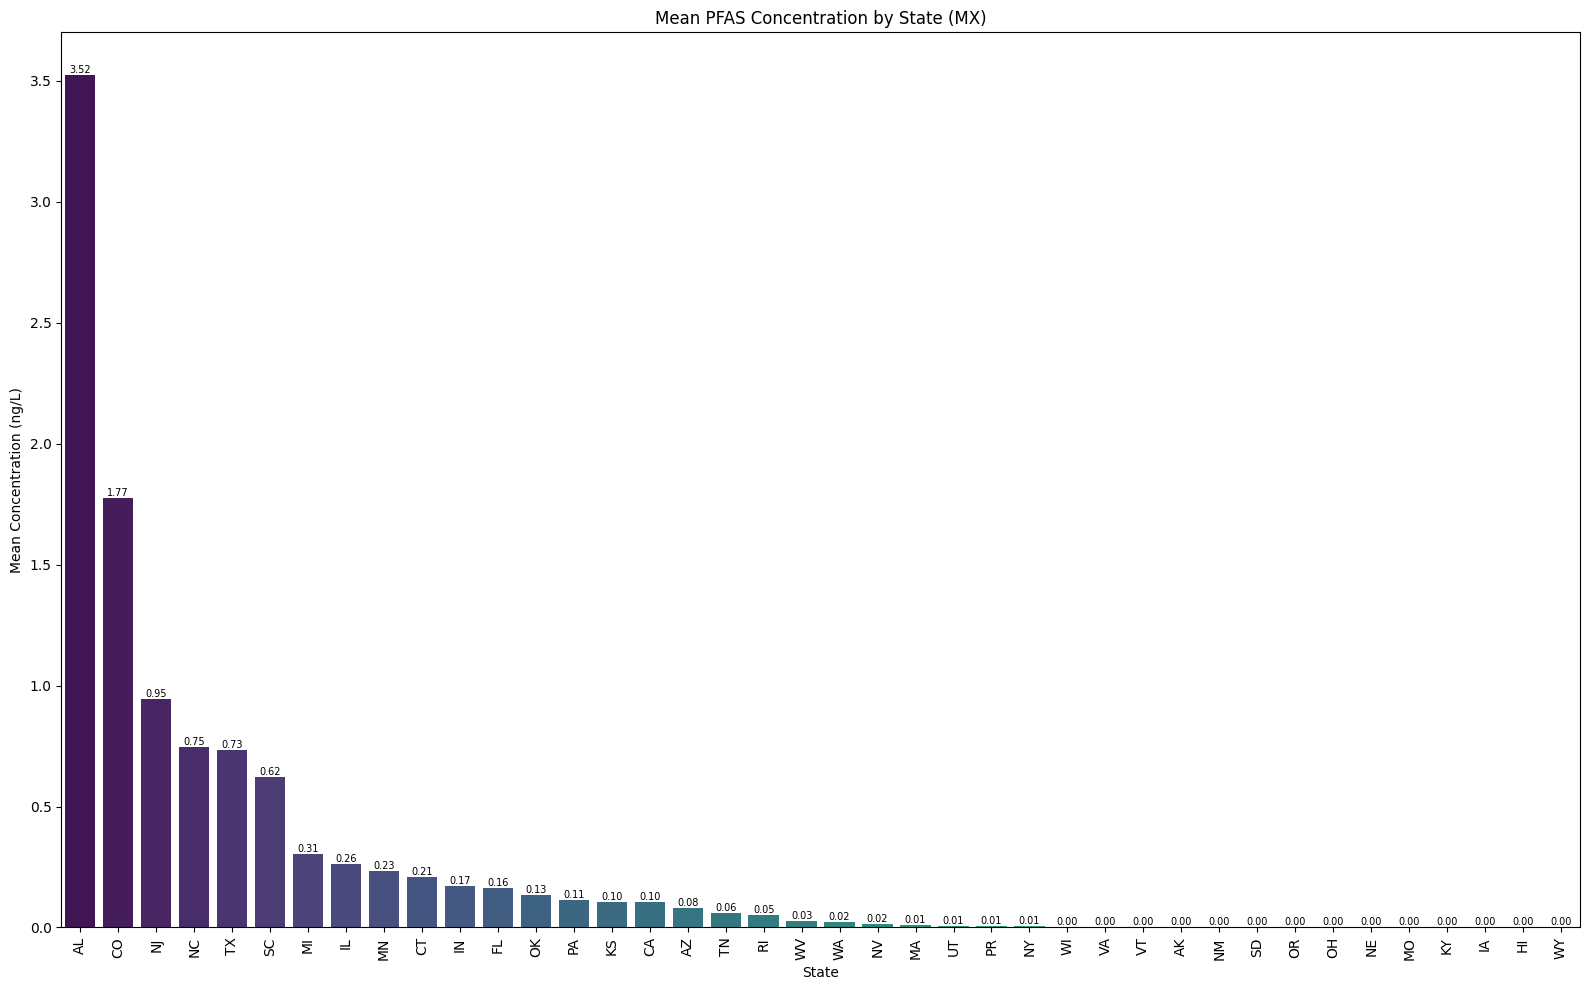

In [45]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x='state', 
    y='concentration', 
    data=ucmr_mx.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by State (MX)')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 7, color = 'black',  # Customize text appearance
    )


plt.show()

In [92]:
ucmr_pfas_avg_mx = ucmr_mx.groupby('state')['concentration'].mean().reset_index() # mean concentration

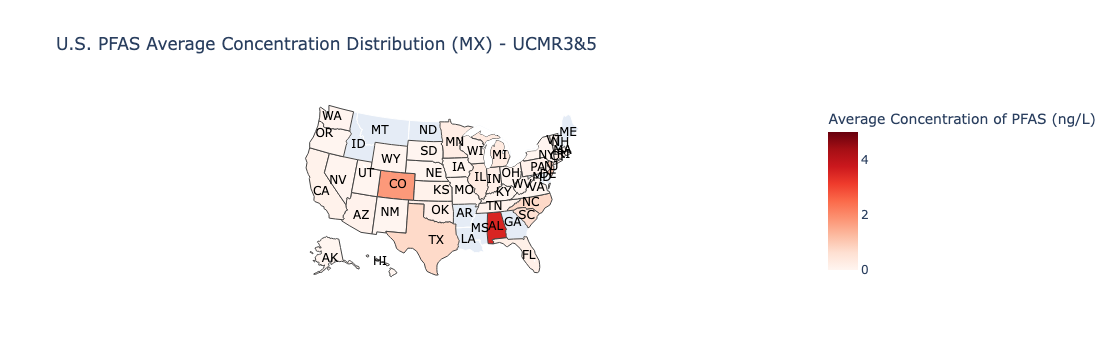

In [99]:
fig = px.choropleth(
    ucmr_pfas_avg_mx, 
    locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
    locationmode="USA-states",  # Use the USA state map
    color='concentration',  # The PFAS analyte column to visualize
    hover_name='state',  # The column to show on hover (state names)
    scope="usa",  # Focus the map on the USA
    color_continuous_scale="Reds",  # Color scale for concentrations
    labels= {'concentration': 'Average Concentration of PFAS (ng/L)'},
    title='U.S. PFAS Concentration Distribution',
    range_color=[0, 5] 
)

# Customize the layout
fig.update_layout(
    title_text='U.S. PFAS Average Concentration Distribution (MX) - UCMR3&5',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
    )
)

# Add state code annotations
for state, coords in state_coordinates.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[coords[1]],
        lat=[coords[0]],
        text=state,
        mode='text',
        showlegend=False,
        textfont=dict(
            size=12,
            color='black'
        )
    ))
fig.write_html('avg_PFAS_concentration_map_ucmr3&5(MX).html')
# Show the map
fig.show()

In [46]:
ucmr_mx.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

,analyte,concentration
24,PFPEA,2.547053
2,6:2 FTS,1.248370
10,PFBA,1.006510
17,PFHXA,0.714195
23,PFOS,0.470260
18,PFHXS,0.429771
11,PFBS,0.394115
22,PFOA,0.347708
15,PFHPA,0.076563
5,ADONA,0.006058


/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51051/4111631337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


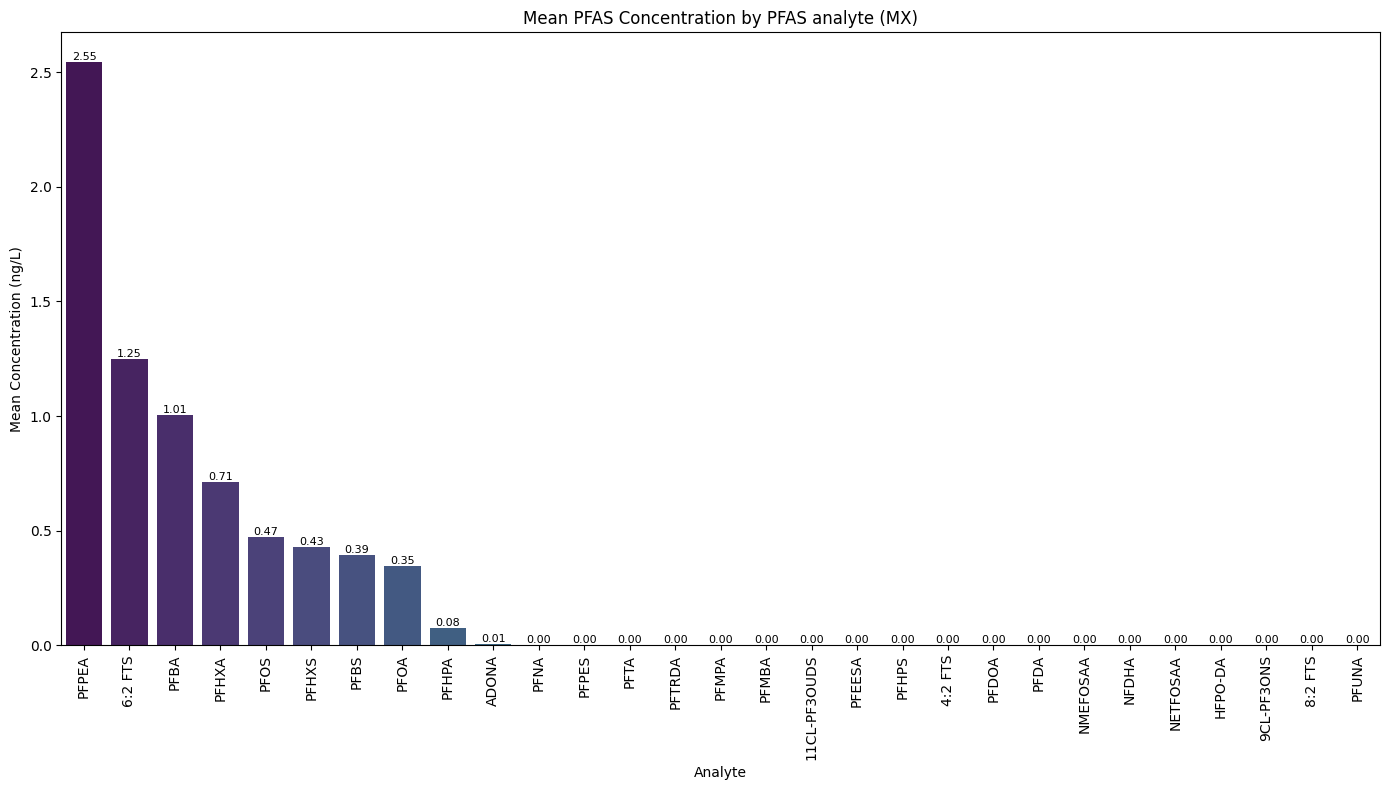

In [47]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='analyte', 
    y='concentration', 
    data=ucmr_mx.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by PFAS analyte (MX)')
plt.xlabel('Analyte')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 8, color = 'black',  # Customize text appearance
    )


plt.show()

## Other analysis